In [1]:
import requests
import pandas as pd

def gather_team_data(team_id):

    url = "https://www.balldontlie.io/api/v1/games"
    params = {
        'seasons[]': ['2015', '2016', '2017'],
        'team_ids[]': [str(team_id)],  
        'per_page': '100', 
    }

    all_games = []
    page = 0

    while True:
        params['page'] = page
        # Sending a GET request to the URL
        response = requests.get(url, params=params)

    
        if response.status_code != 200:
            print(f"Failed to retrieve data: {response.status_code}")
            break
        
        # Parsing the JSON response
        data = response.json()
        
        # Add the retrieved games to the all_games list
        all_games.extend(data['data'])

        # This checks for there are more pages to retrieve for the requested team
        if data['meta']['next_page']:
            page += 1
        else:
            break
    
    return all_games  

# Gather data for Toronto Raptors (team_id 28)
raptors_games = gather_team_data(28)
# Gather data for Los Angeles Clippers (team_id 13)
clippers_games = gather_team_data(13)

# Create a DataFrame from the gathered game data for both teams
raptors_df = pd.json_normalize(raptors_games)

clippers_df = pd.json_normalize(clippers_games)

raptors_df




,id,date,home_team_score,period,postseason,season,status,time,visitor_team_score,home_team.id,...,home_team.division,home_team.full_name,home_team.name,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name
0,27306,2015-12-09T00:00:00.000Z,97,4,False,2015,Final,,94,28,...,Atlantic,Toronto Raptors,Raptors,27,SAS,San Antonio,West,Southwest,San Antonio Spurs,Spurs
1,27309,2015-12-13T00:00:00.000Z,96,4,False,2015,Final,,76,28,...,Atlantic,Toronto Raptors,Raptors,23,PHI,Philadelphia,East,Atlantic,Philadelphia 76ers,76ers
2,27397,2015-12-03T00:00:00.000Z,105,4,False,2015,Final,,106,28,...,Atlantic,Toronto Raptors,Raptors,8,DEN,Denver,West,Northwest,Denver Nuggets,Nuggets
3,27424,2016-01-04T00:00:00.000Z,122,4,False,2015,Final,,100,6,...,Central,Cleveland Cavaliers,Cavaliers,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
4,27427,2016-01-08T00:00:00.000Z,88,4,False,2015,Final,,97,30,...,Southeast,Washington Wizards,Wizards,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,34312,2017-04-22T00:00:00.000Z,76,4,True,2016,Final,,87,17,...,Central,Milwaukee Bucks,Bucks,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
382,34476,2017-05-05T00:00:00.000Z,94,4,True,2016,Final,,115,28,...,Atlantic,Toronto Raptors,Raptors,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
383,34799,2018-04-17T00:00:00.000Z,130,4,True,2017,Final,,119,28,...,Atlantic,Toronto Raptors,Raptors,30,WAS,Washington,East,Southeast,Washington Wizards,Wizards
384,34808,2018-04-27T00:00:00.000Z,92,4,True,2017,Final,,102,30,...,Southeast,Washington Wizards,Wizards,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors


In [2]:
raptors_df.dtypes

id                            int64
date                         object
home_team_score               int64
period                        int64
postseason                     bool
season                        int64
status                       object
time                         object
visitor_team_score            int64
home_team.id                  int64
home_team.abbreviation       object
home_team.city               object
home_team.conference         object
home_team.division           object
home_team.full_name          object
home_team.name               object
visitor_team.id               int64
visitor_team.abbreviation    object
visitor_team.city            object
visitor_team.conference      object
visitor_team.division        object
visitor_team.full_name       object
visitor_team.name            object
dtype: object

In [3]:
# Convert the date column to a datetime object
raptors_df['date'] = pd.to_datetime(raptors_df['date']).dt.date
raptors_df['date'] = pd.to_datetime(raptors_df['date']).dt.normalize()

In [4]:
raptors_df.dtypes

id                                    int64
date                         datetime64[ns]
home_team_score                       int64
period                                int64
postseason                             bool
season                                int64
status                               object
time                                 object
visitor_team_score                    int64
home_team.id                          int64
home_team.abbreviation               object
home_team.city                       object
home_team.conference                 object
home_team.division                   object
home_team.full_name                  object
home_team.name                       object
visitor_team.id                       int64
visitor_team.abbreviation            object
visitor_team.city                    object
visitor_team.conference              object
visitor_team.division                object
visitor_team.full_name               object
visitor_team.name               

In [5]:
raptors_df.tail()

,id,date,home_team_score,period,postseason,season,status,time,visitor_team_score,home_team.id,...,home_team.division,home_team.full_name,home_team.name,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name
381,34312,2017-04-22,76,4,True,2016,Final,,87,17,...,Central,Milwaukee Bucks,Bucks,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
382,34476,2017-05-05,94,4,True,2016,Final,,115,28,...,Atlantic,Toronto Raptors,Raptors,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
383,34799,2018-04-17,130,4,True,2017,Final,,119,28,...,Atlantic,Toronto Raptors,Raptors,30,WAS,Washington,East,Southeast,Washington Wizards,Wizards
384,34808,2018-04-27,92,4,True,2017,Final,,102,30,...,Southeast,Washington Wizards,Wizards,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
385,35639,2018-05-01,112,4,True,2017,Final,,113,28,...,Atlantic,Toronto Raptors,Raptors,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers


In [6]:
# Look for duplicate within the dataframe, id column
raptors_df.duplicated(subset=['id']).sum()

100

In [7]:
# Remove duplicate rows
raptors_df.drop_duplicates(subset=['id'], inplace=True)

In [8]:
raptors_df.shape

(286, 23)

In [9]:
# Look for missing values or null values
raptors_df.isnull().sum()

id                           0
date                         0
home_team_score              0
period                       0
postseason                   0
season                       0
status                       0
time                         0
visitor_team_score           0
home_team.id                 0
home_team.abbreviation       0
home_team.city               0
home_team.conference         0
home_team.division           0
home_team.full_name          0
home_team.name               0
visitor_team.id              0
visitor_team.abbreviation    0
visitor_team.city            0
visitor_team.conference      0
visitor_team.division        0
visitor_team.full_name       0
visitor_team.name            0
dtype: int64

In [10]:
raptors_df.describe()

,id,date,home_team_score,period,season,visitor_team_score,home_team.id,visitor_team.id
count,286.000000,286,286.000000,286.0,286.000000,286.000000,286.000000,286.000000
mean,32917.153846,2017-01-18 22:19:18.041958144,105.353147,4.0,2015.965035,102.094406,21.202797,20.972028
min,27306.000000,2015-10-28 00:00:00,74.000000,4.0,2015.000000,73.000000,1.000000,1.000000
25%,32446.000000,2016-03-26 12:00:00,96.000000,4.0,2015.000000,93.000000,14.250000,14.000000
50%,33691.000000,2017-01-17 12:00:00,105.000000,4.0,2016.000000,101.500000,28.000000,28.000000
75%,34473.000000,2017-11-30 12:00:00,114.000000,4.0,2017.000000,111.000000,28.000000,28.000000
max,35639.000000,2018-05-07 00:00:00,133.000000,4.0,2017.000000,132.000000,30.000000,30.000000
std,2264.502626,NaN,11.987323,0.0,0.824303,12.318927,9.202257,9.268278


In [11]:
# Organize by date 
raptors_df.sort_values(by=['date'], inplace=True)
raptors_df.tail()

,id,date,home_team_score,period,postseason,season,status,time,visitor_team_score,home_team.id,...,home_team.division,home_team.full_name,home_team.name,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name
384,34808,2018-04-27,92,4,True,2017,Final,,102,30,...,Southeast,Washington Wizards,Wizards,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
385,35639,2018-05-01,112,4,True,2017,Final,,113,28,...,Atlantic,Toronto Raptors,Raptors,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
347,33043,2018-05-03,110,4,True,2017,Final,,128,28,...,Atlantic,Toronto Raptors,Raptors,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
348,33047,2018-05-05,105,4,True,2017,Final,,103,6,...,Central,Cleveland Cavaliers,Cavaliers,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
349,33051,2018-05-07,128,4,True,2017,Final,,93,6,...,Central,Cleveland Cavaliers,Cavaliers,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors


In [12]:
# Remove time column
raptors_df.drop(columns=['time'], inplace=True)
raptors_df.tail()

,id,date,home_team_score,period,postseason,season,status,visitor_team_score,home_team.id,home_team.abbreviation,...,home_team.division,home_team.full_name,home_team.name,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name
384,34808,2018-04-27,92,4,True,2017,Final,102,30,WAS,...,Southeast,Washington Wizards,Wizards,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
385,35639,2018-05-01,112,4,True,2017,Final,113,28,TOR,...,Atlantic,Toronto Raptors,Raptors,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
347,33043,2018-05-03,110,4,True,2017,Final,128,28,TOR,...,Atlantic,Toronto Raptors,Raptors,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
348,33047,2018-05-05,105,4,True,2017,Final,103,6,CLE,...,Central,Cleveland Cavaliers,Cavaliers,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
349,33051,2018-05-07,128,4,True,2017,Final,93,6,CLE,...,Central,Cleveland Cavaliers,Cavaliers,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors


In [13]:
raptors_df.columns

Index(['id', 'date', 'home_team_score', 'period', 'postseason', 'season',
       'status', 'visitor_team_score', 'home_team.id',
       'home_team.abbreviation', 'home_team.city', 'home_team.conference',
       'home_team.division', 'home_team.full_name', 'home_team.name',
       'visitor_team.id', 'visitor_team.abbreviation', 'visitor_team.city',
       'visitor_team.conference', 'visitor_team.division',
       'visitor_team.full_name', 'visitor_team.name'],
      dtype='object')

In [14]:
# Create a new column that shows if the team won or lost the game (WIN, LOSS) 
raptors_df['outcome'] = raptors_df.apply(lambda x: 'WIN' if x['home_team.id'] == 28 and x['home_team_score'] > x['visitor_team_score'] or x['visitor_team.id'] == 28 and x['visitor_team_score'] > x['home_team_score'] else 'LOSS', axis=1)
raptors_df

,id,date,home_team_score,period,postseason,season,status,visitor_team_score,home_team.id,home_team.abbreviation,...,home_team.full_name,home_team.name,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name,outcome
14,27820,2015-10-28,106,4,False,2015,Final,99,28,TOR,...,Toronto Raptors,Raptors,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,WIN
9,27689,2015-10-30,103,4,False,2015,Final,113,2,BOS,...,Boston Celtics,Celtics,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN
22,28885,2015-11-01,106,4,False,2015,Final,87,28,TOR,...,Toronto Raptors,Raptors,17,MIL,Milwaukee,East,Central,Milwaukee Bucks,Bucks,WIN
27,29251,2015-11-03,91,4,False,2015,Final,102,7,DAL,...,Dallas Mavericks,Mavericks,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN
62,31100,2015-11-04,98,4,False,2015,Final,103,21,OKC,...,Oklahoma City Thunder,Thunder,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,34808,2018-04-27,92,4,True,2017,Final,102,30,WAS,...,Washington Wizards,Wizards,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN
385,35639,2018-05-01,112,4,True,2017,Final,113,28,TOR,...,Toronto Raptors,Raptors,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS
347,33043,2018-05-03,110,4,True,2017,Final,128,28,TOR,...,Toronto Raptors,Raptors,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS
348,33047,2018-05-05,105,4,True,2017,Final,103,6,CLE,...,Cleveland Cavaliers,Cavaliers,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,LOSS


In [15]:
# Made a new df that only shows the postseason games
raptors_postseason_df = raptors_df.loc[raptors_df['postseason'] == True]
raptors_postseason_df

,id,date,home_team_score,period,postseason,season,status,visitor_team_score,home_team.id,home_team.abbreviation,...,home_team.full_name,home_team.name,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name,outcome
353,33748,2016-04-16,90,4,True,2015,Final,100,28,TOR,...,Toronto Raptors,Raptors,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,LOSS
354,33750,2016-04-18,98,4,True,2015,Final,87,28,TOR,...,Toronto Raptors,Raptors,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,WIN
358,33880,2016-04-21,85,4,True,2015,Final,101,12,IND,...,Indiana Pacers,Pacers,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN
355,33755,2016-04-23,100,4,True,2015,Final,83,12,IND,...,Indiana Pacers,Pacers,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,LOSS
359,33885,2016-04-26,102,4,True,2015,Final,99,28,TOR,...,Toronto Raptors,Raptors,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,WIN
360,33888,2016-04-29,101,4,True,2015,Final,83,12,IND,...,Indiana Pacers,Pacers,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,LOSS
361,33889,2016-05-01,89,4,True,2015,Final,84,28,TOR,...,Toronto Raptors,Raptors,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,WIN
376,34017,2016-05-03,96,4,True,2015,Final,102,28,TOR,...,Toronto Raptors,Raptors,16,MIA,Miami,East,Southeast,Miami Heat,Heat,LOSS
362,33893,2016-05-05,96,4,True,2015,Final,92,28,TOR,...,Toronto Raptors,Raptors,16,MIA,Miami,East,Southeast,Miami Heat,Heat,WIN
377,34019,2016-05-07,91,4,True,2015,Final,95,16,MIA,...,Miami Heat,Heat,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN


In [16]:
# Made a new df that only shows the regular season games
raptors_regularseason_df = raptors_df.loc[raptors_df['postseason'] == False]
raptors_regularseason_df

,id,date,home_team_score,period,postseason,season,status,visitor_team_score,home_team.id,home_team.abbreviation,...,home_team.full_name,home_team.name,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name,outcome
14,27820,2015-10-28,106,4,False,2015,Final,99,28,TOR,...,Toronto Raptors,Raptors,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,WIN
9,27689,2015-10-30,103,4,False,2015,Final,113,2,BOS,...,Boston Celtics,Celtics,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN
22,28885,2015-11-01,106,4,False,2015,Final,87,28,TOR,...,Toronto Raptors,Raptors,17,MIL,Milwaukee,East,Central,Milwaukee Bucks,Bucks,WIN
27,29251,2015-11-03,91,4,False,2015,Final,102,7,DAL,...,Dallas Mavericks,Mavericks,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN
62,31100,2015-11-04,98,4,False,2015,Final,103,21,OKC,...,Oklahoma City Thunder,Thunder,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,34532,2018-04-04,96,4,False,2017,Final,78,28,TOR,...,Toronto Raptors,Raptors,2,BOS,Boston,East,Atlantic,Boston Celtics,Celtics,WIN
304,33275,2018-04-06,92,4,False,2017,Final,73,28,TOR,...,Toronto Raptors,Raptors,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,WIN
334,34954,2018-04-08,112,4,False,2017,Final,101,28,TOR,...,Toronto Raptors,Raptors,22,ORL,Orlando,East,Southeast,Orlando Magic,Magic,WIN
300,33025,2018-04-09,98,4,False,2017,Final,108,9,DET,...,Detroit Pistons,Pistons,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN


<Axes: xlabel='outcome'>

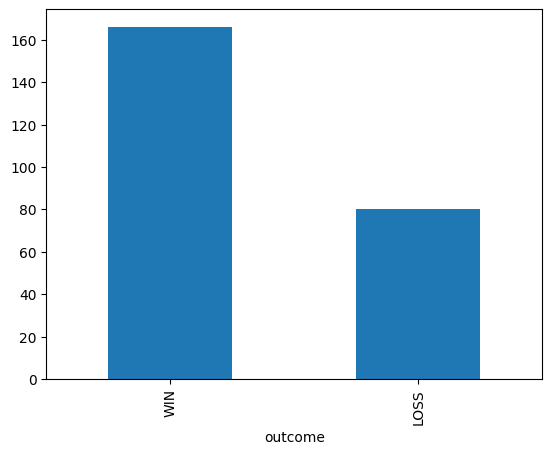

In [17]:
# Visualize the number of wins and losses for the regular season
raptors_regularseason_df['outcome'].value_counts().plot(kind='bar')

<Axes: xlabel='outcome'>

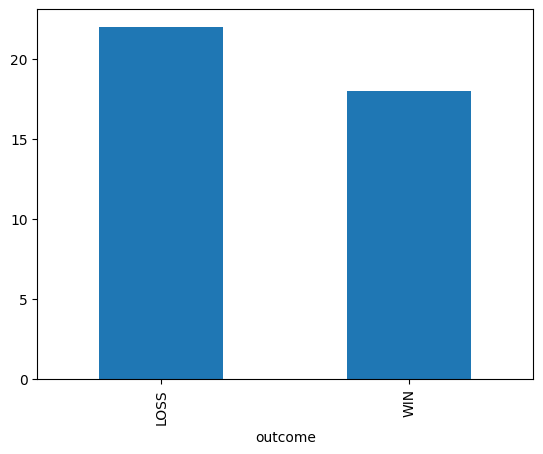

In [18]:
# Visualize the number of wins and losses for the postseason
raptors_postseason_df['outcome'].value_counts().plot(kind='bar')

<Axes: >

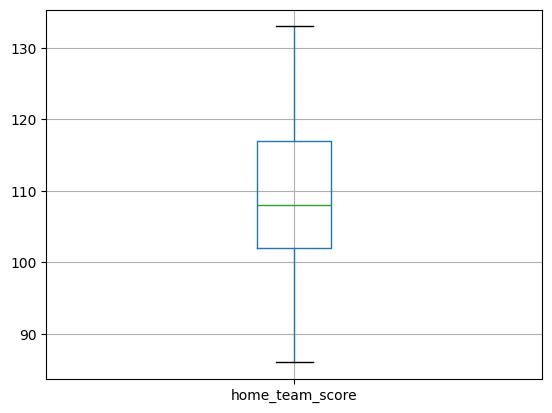

In [32]:
# Boxplot of the regular season scores for the Raptors home games with id 28
raptors_regularseason_df.loc[raptors_regularseason_df['home_team.id'] == 28].boxplot(column=['home_team_score'])


<Axes: >

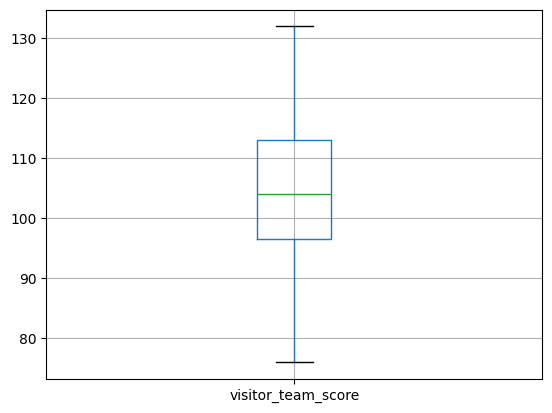

In [33]:
# Boxplot of the regular season scores for the Raptors away games with id 28
raptors_regularseason_df.loc[raptors_regularseason_df['visitor_team.id'] == 28].boxplot(column=['visitor_team_score'])

In [45]:
# Show home_team.city column with nan values on latitude and longitude
raptors_regularseason_df[raptors_regularseason_df['latitude'].isnull()]['home_team.city'].value_counts()

home_team.city
Washington      6
Indiana         5
Golden State    3
Utah            3
LA              3
Minnesota       3
Name: count, dtype: int64

In [52]:
# Adding coordinates to visualize map later on tableau
team_coordinates = {
    'Atlanta': (33.757290, -84.397331),
    'Boston': (42.366291, -71.062630),
    'Brooklyn': (40.682732, -73.975876),
    'Charlotte': (35.2271, -80.8431),
    'Chicago': (41.880692, -87.674370),
    'Cleveland': (41.496389, -81.688056),
    'Dallas': (32.790527, -96.810883),
    'Denver': (39.748920, -105.008400),
    'Detroit': (42.341111, -83.055000),
    'Golden State': (37.768056, -122.387500),
    'Houston': (29.750833, -95.362222),
    'Indiana': (39.763889, -86.155556),
    'LA': (34.043087, -118.267616),
    'Memphis': (35.138056, -90.050556),
    'Miami': (25.781441, -80.188332),
    'Milwaukee': (43.0389, -87.9065),
    'Minnesota': (44.979444, -93.276111),
    'New Orleans': (29.949167, -90.081944),
    'New York': (40.750556, -73.993611),
    'Orlando': (28.539167, -81.383611),
    'Oklahoma City': (35.4634, -97.5151),
    'Philadelphia': (39.901111, -75.171944),
    'Phoenix': (33.445833, -112.071389),
    'Portland': (45.531944, -122.666667),
    'Sacramento': (38.5816, -121.4944),
    'San Antonio': (29.426944, -98.437500),
    'Toronto': (43.643475, -79.379379),
    'Utah': (40.7608, -111.8910),
    'Washington': (38.898129, -77.021172),
}

# For regular season
raptors_regularseason_df['latitude'] = raptors_regularseason_df['home_team.city'].map(lambda x: team_coordinates[x][0] if x in team_coordinates else None)
raptors_regularseason_df['longitude'] = raptors_regularseason_df['home_team.city'].map(lambda x: team_coordinates[x][1] if x in team_coordinates else None)

# For postseason
raptors_postseason_df['latitude'] = raptors_postseason_df['home_team.city'].map(lambda x: team_coordinates[x][0] if x in team_coordinates else None)
raptors_postseason_df['longitude'] = raptors_postseason_df['home_team.city'].map(lambda x: team_coordinates[x][1] if x in team_coordinates else None)

raptors_regularseason_df

/var/folders/8t/lg39pr1d1nl876vc8zzbm2zm0000gn/T/ipykernel_36808/741643401.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raptors_regularseason_df['latitude'] = raptors_regularseason_df['home_team.city'].map(lambda x: team_coordinates[x][0] if x in team_coordinates else None)
/var/folders/8t/lg39pr1d1nl876vc8zzbm2zm0000gn/T/ipykernel_36808/741643401.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raptors_regularseason_df['longitude'] = raptors_regularseason_df['home_team.city'].map(lambda x: team

,id,date,home_team_score,period,postseason,season,status,visitor_team_score,home_team.id,home_team.abbreviation,...,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name,outcome,latitude,longitude
14,27820,2015-10-28,106,4,False,2015,Final,99,28,TOR,...,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,WIN,43.643475,-79.379379
9,27689,2015-10-30,103,4,False,2015,Final,113,2,BOS,...,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN,42.366291,-71.062630
22,28885,2015-11-01,106,4,False,2015,Final,87,28,TOR,...,17,MIL,Milwaukee,East,Central,Milwaukee Bucks,Bucks,WIN,43.643475,-79.379379
27,29251,2015-11-03,91,4,False,2015,Final,102,7,DAL,...,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN,32.790527,-96.810883
62,31100,2015-11-04,98,4,False,2015,Final,103,21,OKC,...,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN,35.463400,-97.515100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,34532,2018-04-04,96,4,False,2017,Final,78,28,TOR,...,2,BOS,Boston,East,Atlantic,Boston Celtics,Celtics,WIN,43.643475,-79.379379
304,33275,2018-04-06,92,4,False,2017,Final,73,28,TOR,...,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,WIN,43.643475,-79.379379
334,34954,2018-04-08,112,4,False,2017,Final,101,28,TOR,...,22,ORL,Orlando,East,Southeast,Orlando Magic,Magic,WIN,43.643475,-79.379379
300,33025,2018-04-09,98,4,False,2017,Final,108,9,DET,...,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN,42.341111,-83.055000


In [53]:
# nans for rapotrs regular season
raptors_regularseason_df[raptors_regularseason_df['latitude'].isnull()]['home_team.city'].value_counts()

home_team.city
Los Angeles    3
Name: count, dtype: int64

In [55]:
# Drop columns latitude and longitude for regular season and postseason
raptors_regularseason_df.drop(columns=['latitude', 'longitude'], inplace=True)
raptors_postseason_df.drop(columns=['latitude', 'longitude'], inplace=True)



/var/folders/8t/lg39pr1d1nl876vc8zzbm2zm0000gn/T/ipykernel_36808/1251239402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raptors_regularseason_df.drop(columns=['latitude', 'longitude'], inplace=True)
/var/folders/8t/lg39pr1d1nl876vc8zzbm2zm0000gn/T/ipykernel_36808/1251239402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raptors_postseason_df.drop(columns=['latitude', 'longitude'], inplace=True)


In [19]:
# Adding coordinates to visualize map later on tableau
team_coordinates = {
    'Atlanta': (33.757290, -84.397331),
    'Boston': (42.366291, -71.062630),
    'Brooklyn': (40.682732, -73.975876),
    'Charlotte': (35.2271, -80.8431),
    'Chicago': (41.880692, -87.674370),
    'Cleveland': (41.496389, -81.688056),
    'Dallas': (32.790527, -96.810883),
    'Denver': (39.748920, -105.008400),
    'Detroit': (42.341111, -83.055000),
    'Golden State': (37.768056, -122.387500),
    'Houston': (29.750833, -95.362222),
    'Indiana': (39.763889, -86.155556),
    'LA': (34.043087, -118.267616),
    'Los Angeles': (34.043087, -118.267616),
    'Memphis': (35.138056, -90.050556),
    'Miami': (25.781441, -80.188332),
    'Milwaukee': (43.0389, -87.9065),
    'Minnesota': (44.979444, -93.276111),
    'New Orleans': (29.949167, -90.081944),
    'New York': (40.750556, -73.993611),
    'Orlando': (28.539167, -81.383611),
    'Oklahoma City': (35.4634, -97.5151),
    'Philadelphia': (39.901111, -75.171944),
    'Phoenix': (33.445833, -112.071389),
    'Portland': (45.531944, -122.666667),
    'Sacramento': (38.5816, -121.4944),
    'San Antonio': (29.426944, -98.437500),
    'Toronto': (43.643475, -79.379379),
    'Utah': (40.7608, -111.8910),
    'Washington': (38.898129, -77.021172),
}

# For regular season
raptors_regularseason_df['latitude'] = raptors_regularseason_df['home_team.city'].map(lambda x: team_coordinates[x][0] if x in team_coordinates else None)
raptors_regularseason_df['longitude'] = raptors_regularseason_df['home_team.city'].map(lambda x: team_coordinates[x][1] if x in team_coordinates else None)

# For postseason
raptors_postseason_df['latitude'] = raptors_postseason_df['home_team.city'].map(lambda x: team_coordinates[x][0] if x in team_coordinates else None)
raptors_postseason_df['longitude'] = raptors_postseason_df['home_team.city'].map(lambda x: team_coordinates[x][1] if x in team_coordinates else None)

raptors_regularseason_df

/var/folders/8t/lg39pr1d1nl876vc8zzbm2zm0000gn/T/ipykernel_16110/3151795725.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raptors_regularseason_df['latitude'] = raptors_regularseason_df['home_team.city'].map(lambda x: team_coordinates[x][0] if x in team_coordinates else None)
/var/folders/8t/lg39pr1d1nl876vc8zzbm2zm0000gn/T/ipykernel_16110/3151795725.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raptors_regularseason_df['longitude'] = raptors_regularseason_df['home_team.city'].map(lambda x: te

,id,date,home_team_score,period,postseason,season,status,visitor_team_score,home_team.id,home_team.abbreviation,...,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name,outcome,latitude,longitude
14,27820,2015-10-28,106,4,False,2015,Final,99,28,TOR,...,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,WIN,43.643475,-79.379379
9,27689,2015-10-30,103,4,False,2015,Final,113,2,BOS,...,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN,42.366291,-71.062630
22,28885,2015-11-01,106,4,False,2015,Final,87,28,TOR,...,17,MIL,Milwaukee,East,Central,Milwaukee Bucks,Bucks,WIN,43.643475,-79.379379
27,29251,2015-11-03,91,4,False,2015,Final,102,7,DAL,...,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN,32.790527,-96.810883
62,31100,2015-11-04,98,4,False,2015,Final,103,21,OKC,...,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN,35.463400,-97.515100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,34532,2018-04-04,96,4,False,2017,Final,78,28,TOR,...,2,BOS,Boston,East,Atlantic,Boston Celtics,Celtics,WIN,43.643475,-79.379379
304,33275,2018-04-06,92,4,False,2017,Final,73,28,TOR,...,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,WIN,43.643475,-79.379379
334,34954,2018-04-08,112,4,False,2017,Final,101,28,TOR,...,22,ORL,Orlando,East,Southeast,Orlando Magic,Magic,WIN,43.643475,-79.379379
300,33025,2018-04-09,98,4,False,2017,Final,108,9,DET,...,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN,42.341111,-83.055000


In [20]:
# nans for rapotrs regular season latitude and longitude
raptors_regularseason_df[raptors_regularseason_df['latitude'].isnull()]['home_team.city'].value_counts()

Series([], Name: count, dtype: int64)

In [21]:
# Convert to csv files
raptors_regularseason_df.to_csv('raptors_regularseason.csv', index=False)
raptors_postseason_df.to_csv('raptors_postseason.csv', index=False)

In [22]:
raptors_df['home_team.city']

14           Toronto
9             Boston
22           Toronto
27            Dallas
62     Oklahoma City
           ...      
384       Washington
385          Toronto
347          Toronto
348        Cleveland
349        Cleveland
Name: home_team.city, Length: 286, dtype: object

In [44]:
# Check demar derozan's stats
raptors_stats_df.loc[raptors_stats_df['player.first_name'] == 'DeMar']

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,player.position,player.team_id,player.weight_pounds,team.id,team.abbreviation,team.city,team.conference,team.division,team.full_name,team.name
66,744035,2.0,0.0,5.0,0.000,1.0,0.0,0.478,23.0,11.0,...,G,5,220.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
330,745541,6.0,0.0,3.0,0.000,1.0,0.0,0.400,15.0,6.0,...,G,5,220.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
290,746314,3.0,0.0,5.0,0.000,2.0,0.0,0.250,16.0,4.0,...,G,5,220.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
27,748420,5.0,0.0,3.0,0.000,2.0,0.0,0.538,26.0,14.0,...,G,5,220.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
79,748726,6.0,1.0,3.0,0.000,0.0,0.0,0.667,15.0,10.0,...,G,5,220.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
15,750465,2.0,0.0,7.0,0.000,1.0,0.0,0.429,14.0,6.0,...,G,5,220.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
201,751036,4.0,0.0,3.0,0.667,3.0,2.0,0.588,17.0,10.0,...,G,5,220.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
343,753242,8.0,0.0,5.0,0.000,1.0,0.0,0.500,14.0,7.0,...,G,5,220.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
37,754432,4.0,0.0,1.0,0.000,1.0,0.0,0.533,15.0,8.0,...,G,5,220.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
53,755322,1.0,1.0,7.0,0.250,4.0,1.0,0.458,24.0,11.0,...,G,5,220.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors


In [45]:
import requests
import pandas as pd
import time

def gather_team_stats(team_id):
    url = "https://www.balldontlie.io/api/v1/stats"
    params = {
        'seasons[]': ['2015', '2016', '2017'],
        'team_ids[]': [str(team_id)],  
        'per_page': '100',  
    }

    all_stats = []
    page = 0

    while True:
        params['page'] = page
        response = requests.get(url, params=params)

        if response.status_code == 429:  # Rate limit encountered
            print("Rate limit reached. Waiting 60 seconds to continue...")
            time.sleep(60)  # Wait for 60 seconds
            continue  # Retry the same request
        elif response.status_code != 200:
            print(f"Failed to retrieve data: {response.status_code}")
            break
        
        data = response.json()
        all_stats.extend([item for item in data['data'] if item['team']['id'] == team_id])

        if not data['meta']['next_page']:
            break
        
        page += 1
        # sleep between successful requests to avoid hitting the rate limit
        time.sleep(1)  # Wait for 1 second before the next page request

    return all_stats  

raptors_stats = gather_team_stats(28)
raptors_stats2_df = pd.json_normalize(raptors_stats)



In [46]:
raptors_stats2_df

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,player.position,player.team_id,player.weight_pounds,team.id,team.abbreviation,team.city,team.conference,team.division,team.full_name,team.name
0,748723,0.0,1.0,3.0,0.000,1.0,0.0,0.600,5.0,3.0,...,G-F,24,206.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
1,748724,1.0,0.0,7.0,0.000,1.0,0.0,0.571,14.0,8.0,...,,11,NaN,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
2,748725,0.0,0.0,5.0,0.000,0.0,0.0,0.714,7.0,5.0,...,C,15,255.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
3,748726,6.0,1.0,3.0,0.000,0.0,0.0,0.667,15.0,10.0,...,G,5,220.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
4,748727,8.0,0.0,5.0,0.333,3.0,1.0,0.545,11.0,6.0,...,G,16,196.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,797494,1.0,1.0,2.0,0.000,0.0,0.0,0.000,0.0,0.0,...,,28,NaN,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
3315,797495,1.0,0.0,1.0,0.000,0.0,0.0,1.000,1.0,1.0,...,F,13,245.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
3316,797496,0.0,1.0,1.0,0.400,5.0,2.0,0.400,5.0,2.0,...,F,25,230.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
3317,797497,1.0,0.0,2.0,0.333,3.0,1.0,0.556,9.0,5.0,...,G,30,183.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors


In [47]:
# Check data types
raptors_stats2_df.dtypes

id                           int64
ast                        float64
blk                        float64
dreb                       float64
fg3_pct                    float64
fg3a                       float64
fg3m                       float64
fg_pct                     float64
fga                        float64
fgm                        float64
ft_pct                     float64
fta                        float64
ftm                        float64
min                         object
oreb                       float64
pf                         float64
pts                        float64
reb                        float64
stl                        float64
turnover                   float64
game.id                      int64
game.date                   object
game.home_team_id            int64
game.home_team_score         int64
game.period                  int64
game.postseason               bool
game.season                  int64
game.status                 object
game.time           

In [51]:
# Convert the date column to a datetime object
raptors_stats2_df['game.date'] = pd.to_datetime(raptors_stats_df['game.date']).dt.date
raptors_stats2_df['game.date'] = pd.to_datetime(raptors_stats_df['game.date']).dt.normalize()

In [52]:
raptors_stats2_df.dtypes

id                                  int64
ast                               float64
blk                               float64
dreb                              float64
fg3_pct                           float64
fg3a                              float64
fg3m                              float64
fg_pct                            float64
fga                               float64
fgm                               float64
ft_pct                            float64
fta                               float64
ftm                               float64
min                                object
oreb                              float64
pf                                float64
pts                               float64
reb                               float64
stl                               float64
turnover                          float64
game.id                             int64
game.date                  datetime64[ns]
game.home_team_id                   int64
game.home_team_score              

In [53]:
# Drop unnecessary columns
raptors_stats2_df.drop(columns=['player.height_feet','player.height_inches'], inplace=True)

In [54]:
# Look for duplicate within the whole dataframe
raptors_stats2_df.duplicated().sum()

986

In [57]:
# Remove duplicate rows
raptors_stats2_df.drop_duplicates(inplace=True)
raptors_stats2_df.shape

(2333, 44)

In [56]:
# Look for missing values or null values
raptors_stats2_df.isnull().sum()

id                            0
ast                         350
blk                         350
dreb                        350
fg3_pct                     350
fg3a                        350
fg3m                        350
fg_pct                      350
fga                         350
fgm                         350
ft_pct                      350
fta                         350
ftm                         350
min                         350
oreb                        350
pf                          350
pts                         350
reb                         350
stl                         350
turnover                    350
game.id                       0
game.date                  2093
game.home_team_id             0
game.home_team_score          0
game.period                   0
game.postseason               0
game.season                   0
game.status                   0
game.time                     0
game.visitor_team_id          0
game.visitor_team_score       0
player.i

In [58]:
# Drop null values for rows with points
raptors_stats2_df.dropna(subset=['pts'], inplace=True)
raptors_stats2_df.shape


(1983, 44)

In [59]:
# Look for missing values or null values
raptors_stats2_df.isnull().sum()

id                            0
ast                           0
blk                           0
dreb                          0
fg3_pct                       0
fg3a                          0
fg3m                          0
fg_pct                        0
fga                           0
fgm                           0
ft_pct                        0
fta                           0
ftm                           0
min                           0
oreb                          0
pf                            0
pts                           0
reb                           0
stl                           0
turnover                      0
game.id                       0
game.date                  1781
game.home_team_id             0
game.home_team_score          0
game.period                   0
game.postseason               0
game.season                   0
game.status                   0
game.time                     0
game.visitor_team_id          0
game.visitor_team_score       0
player.i

In [60]:
# Organize by date
raptors_stats2_df.sort_values(by=['game.date'], inplace=True)

In [61]:
# Show rows with team name Raptors
raptors_stats2_df[raptors_stats2_df['team.name'] == 'Raptors']

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,player.position,player.team_id,player.weight_pounds,team.id,team.abbreviation,team.city,team.conference,team.division,team.full_name,team.name
69,745287,0.0,1.0,2.0,0.000,0.0,0.0,0.000,0.0,0.0,...,C,15,255.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
66,745284,6.0,0.0,5.0,0.000,0.0,0.0,0.409,22.0,9.0,...,G,5,220.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
67,745285,3.0,1.0,3.0,0.286,7.0,2.0,0.467,15.0,7.0,...,G,16,196.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
68,745286,1.0,0.0,2.0,0.500,2.0,1.0,0.333,3.0,1.0,...,F,25,230.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
63,745281,2.0,0.0,1.0,0.500,6.0,3.0,0.583,12.0,7.0,...,F,11,215.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,807216,0.0,0.0,1.0,0.000,2.0,0.0,0.000,2.0,0.0,...,F,13,245.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
3302,807217,1.0,0.0,1.0,0.000,0.0,0.0,0.000,2.0,0.0,...,F,25,230.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
3303,807218,0.0,0.0,5.0,0.000,0.0,0.0,1.000,5.0,5.0,...,C,19,265.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
3304,807219,0.0,0.0,0.0,0.000,0.0,0.0,0.000,3.0,0.0,...,G,10,193.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors


In [62]:
# Check average points per game for the Raptors
raptors_stats2_df['pts'].mean()

9.83862834089763

In [63]:
raptors_stats2_df.columns

Index(['id', 'ast', 'blk', 'dreb', 'fg3_pct', 'fg3a', 'fg3m', 'fg_pct', 'fga',
       'fgm', 'ft_pct', 'fta', 'ftm', 'min', 'oreb', 'pf', 'pts', 'reb', 'stl',
       'turnover', 'game.id', 'game.date', 'game.home_team_id',
       'game.home_team_score', 'game.period', 'game.postseason', 'game.season',
       'game.status', 'game.time', 'game.visitor_team_id',
       'game.visitor_team_score', 'player.id', 'player.first_name',
       'player.last_name', 'player.position', 'player.team_id',
       'player.weight_pounds', 'team.id', 'team.abbreviation', 'team.city',
       'team.conference', 'team.division', 'team.full_name', 'team.name'],
      dtype='object')

In [72]:
# Check game date
raptors_stats2_df['game.date']

69     2015-11-10
66     2015-11-10
67     2015-11-10
68     2015-11-10
63     2015-11-10
          ...    
3301          NaT
3302          NaT
3303          NaT
3304          NaT
3305          NaT
Name: game.date, Length: 1983, dtype: datetime64[ns]

In [70]:
# Check points per game sum for the Raptors
raptors_stats2_df.loc[raptors_stats2_df['team.name'] == 'Raptors'].groupby('game.date')['pts'].sum()

game.date
2015-11-10     91.0
2015-11-18     80.0
2015-11-22     59.0
2015-12-03     91.0
2015-12-09     72.0
2015-12-13     68.0
2015-12-22     50.0
2015-12-28     56.0
2016-01-04     92.0
2016-01-08     86.0
2016-01-09     10.0
2016-02-10     31.0
2016-03-08     50.0
2016-03-17     93.0
2016-04-18    111.0
2016-10-26    106.0
2016-11-02     82.0
2016-11-04     66.0
2016-12-16     68.0
2017-01-27     45.0
2017-03-31     48.0
2017-04-12     97.0
2017-10-23     91.0
2017-12-01     69.0
2018-02-11     96.0
2018-03-02    112.0
2018-03-13     80.0
2018-03-18     90.0
2018-04-06     10.0
Name: pts, dtype: float64

In [71]:
raptors_stats2_df.loc[raptors_stats2_df['team.name'] == 'Raptors'].groupby('game.date')['fg_pct'].sum()

game.date
2015-11-10    2.875
2015-11-18    3.737
2015-11-22    1.848
2015-12-03    3.649
2015-12-09    2.457
2015-12-13    3.444
2015-12-22    3.719
2015-12-28    2.794
2016-01-04    4.257
2016-01-08    3.069
2016-01-09    0.667
2016-02-10    2.142
2016-03-08    1.900
2016-03-17    2.662
2016-04-18    4.179
2016-10-26    4.526
2016-11-02    2.821
2016-11-04    2.869
2016-12-16    2.073
2017-01-27    1.830
2017-03-31    1.950
2017-04-12    5.906
2017-10-23    2.874
2017-12-01    3.679
2018-02-11    3.226
2018-03-02    4.268
2018-03-13    2.697
2018-03-18    3.145
2018-04-06    0.429
Name: fg_pct, dtype: float64

<Axes: xlabel='game.date'>

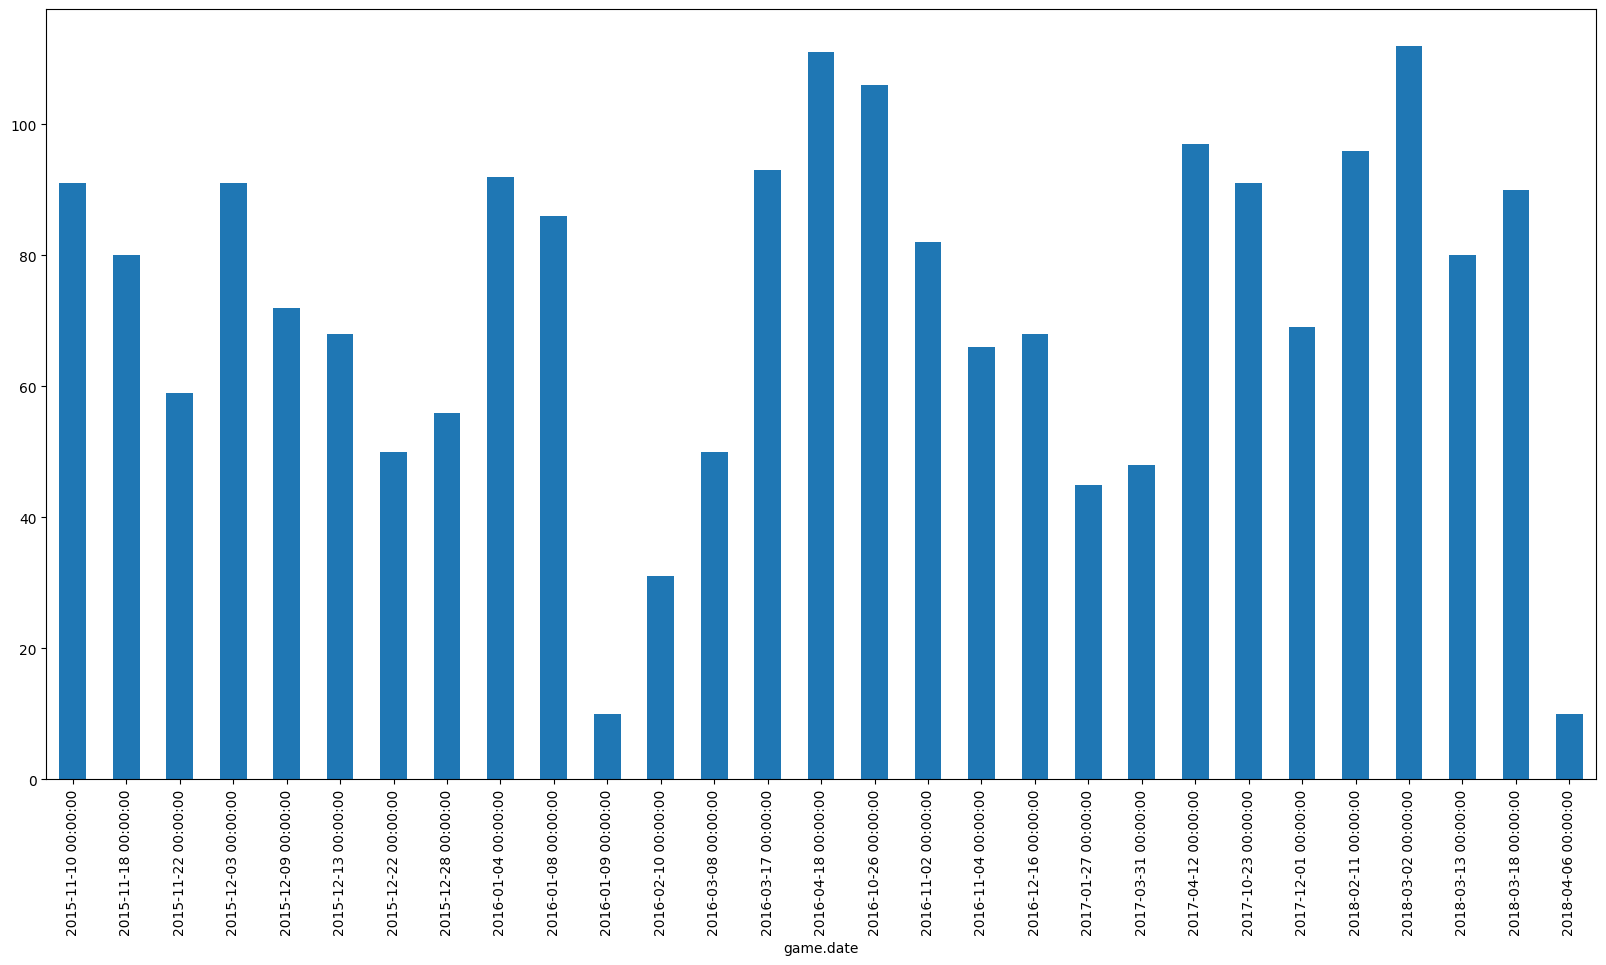

In [74]:
# Bar graph of points per game for the Raptors
raptors_stats2_df.loc[raptors_stats2_df['team.name'] == 'Raptors'].groupby('game.date')['pts'].sum().plot(kind='bar', figsize=(20,10))

<Axes: >

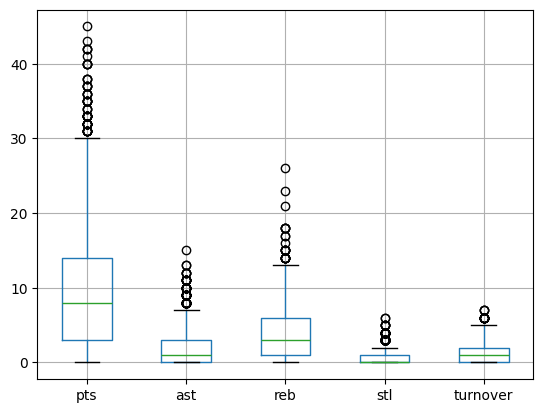

In [81]:
# Average points/assist/rebounds/steals/turnovers per game for the Rapters, boxplot
raptors_stats2_df.loc[raptors_stats2_df['team.name'] == 'Raptors'].boxplot(column=['pts', 'ast', 'reb', 'stl', 'turnover'])

<Axes: >

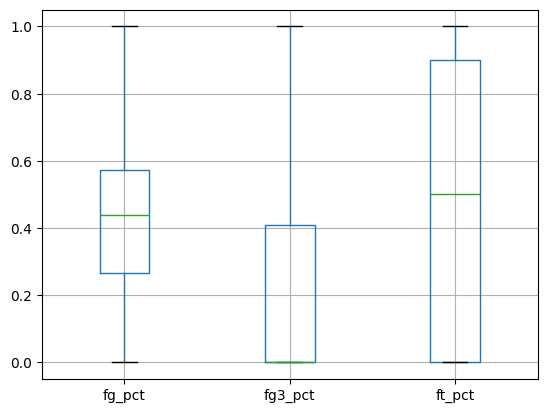

In [80]:
# Average Field Goal Percentage, Shooting Percentage, and Free Throw Percentage for the Raptors Boxplot
raptors_stats2_df.loc[raptors_stats2_df['team.name'] == 'Raptors'].boxplot(column=['fg_pct', 'fg3_pct', 'ft_pct'])

In [73]:
# Convert to csv file
raptors_stats2_df.to_csv('raptors_stats.csv', index=False)